<a href="https://colab.research.google.com/github/ssantoshp/trafalgar/blob/main/trafalgar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#python librairies
# Data manipulation
import numpy as np
import pandas as pd
# Plotting 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab
from datetime import date
# Statistical calculation
from scipy.stats import norm

# Tabular data output
from tabulate import tabulate 
from pandas_datareader import data as web
from tabulate import tabulate
from datetime import datetime
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
import statsmodels.api as sm
from statsmodels import regression
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
def graph_close(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Close']
  df = pd.DataFrame(df)
  plt.figure(figsize=(20,10))
  plt.plot(df.index, df[stock])
  plt.xlabel("Date")
  plt.ylabel("$ price")
  plt.title(" Close Price from "+start_date + " to "+ end_date)
  
  

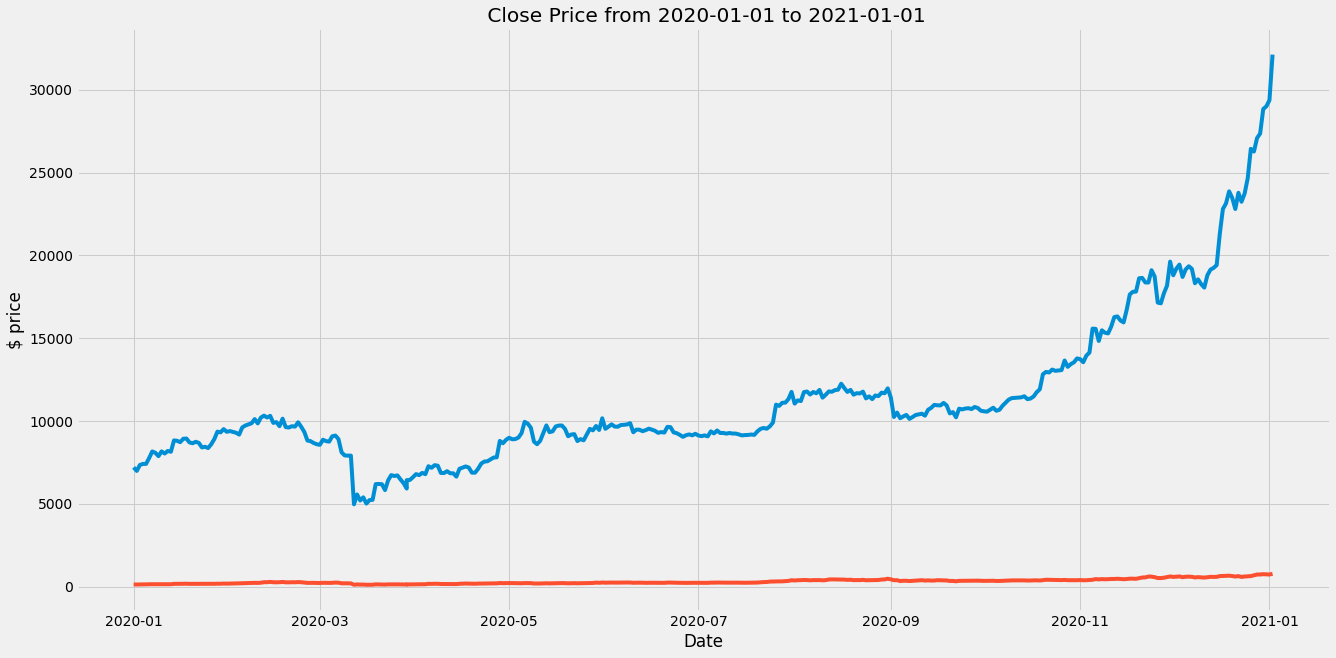

In [ ]:
graph_close(["BTC-USD","ETH-USD"], "2020-01-01", "2021-01-01")

In [ ]:
def graph_open(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Open']
  df = pd.DataFrame(df)
  plt.figure(figsize=(20,10))
  plt.plot(df.index, df[stock])
  plt.xlabel("Date")
  plt.ylabel("$ price")
  plt.title(" Open Price from "+start_date + " to "+ end_date)

In [ ]:
def graph_volume(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Volume']
  df = pd.DataFrame(df)
  plt.figure(figsize=(20,10))
  plt.plot(df.index, df[stock])
  plt.xlabel("Date")
  plt.ylabel("$ price")
  plt.title(" Close Price from "+start_date + " to "+ end_date)

In [ ]:
def graph_adj_close(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Adj Close']
  df = pd.DataFrame(df)
  plt.figure(figsize=(20,10))
  plt.plot(df.index, df[stock])
  plt.xlabel("Date")
  plt.ylabel("$ price")
  plt.title(" Close Price from "+start_date + " to "+ end_date)

In [ ]:
def close(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)
  df = pd.DataFrame(df)
  return df

In [ ]:
def open(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Open']
  df = pd.DataFrame(df)
  return df

In [ ]:
def adj_close(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Adj Close']
  df = pd.DataFrame(df)
  return df

In [ ]:
def volume(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Volume']
  df = pd.DataFrame(df)
  return df

In [ ]:
def returns(stocks, start_date, end_date):
  df = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date)['Close']
  df = pd.DataFrame(df)
  returns = df.pct_change()
  return returns

In [ ]:
def returns_graph(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date)['Close']
  df = pd.DataFrame(df)
  returns = df.pct_change()
  plt.figure(figsize=(20,10))
  plt.plot(returns.index, returns['Close'])
  plt.xlabel("Date")
  plt.ylabel("$ price")
  plt.title(stock + "Revenues from "+start_date + " to "+ end_date)

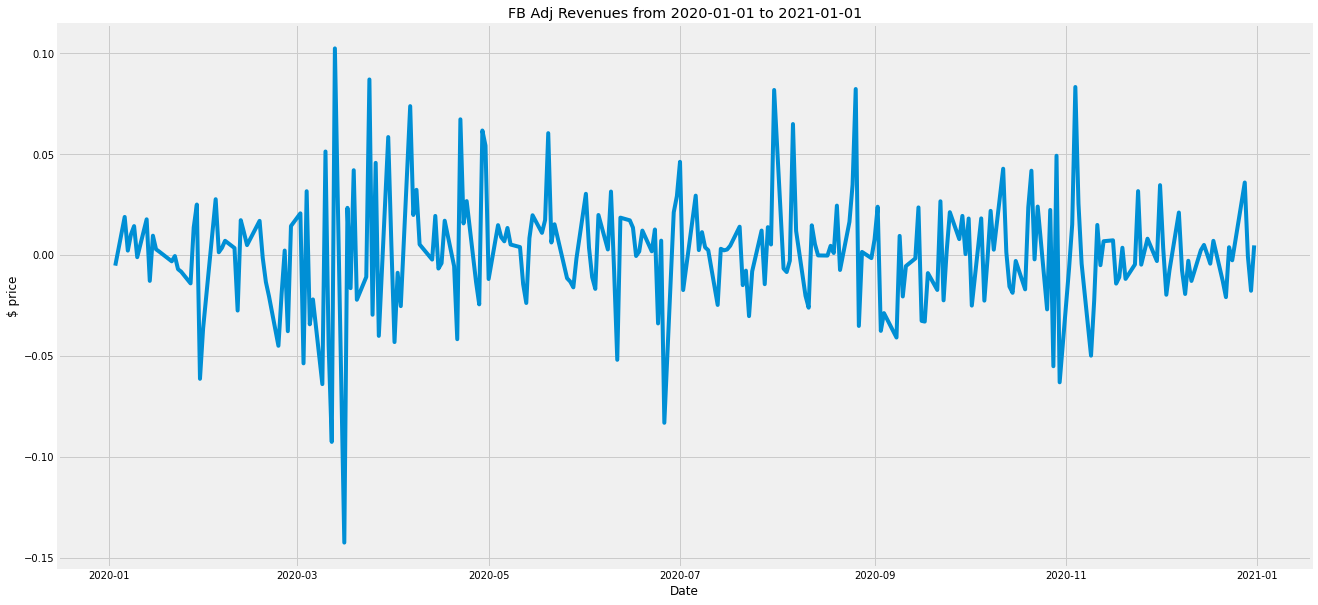

In [ ]:
returns_graph("FB", "2020-01-01", "2021-01-01")

In [ ]:
def covariance(stocks, start_date, end_date, days):
  df = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )['Close']
  df = pd.DataFrame(df)
  returns = df.pct_change()
  cov_matrix_annual = returns.cov()*days
  return cov_matrix_annual


In [ ]:
returns(['AAPL', 'DIS', 'AMD'], "2020-01-01", "2021-01-01")

Symbols,AAPL,DIS,AMD
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009722,-0.011471,-0.010183
2020-01-06,0.007968,-0.005802,-0.004321
2020-01-07,-0.004703,0.000343,-0.002893
2020-01-08,0.016086,-0.002059,-0.008705
...,...,...,...
2020-12-24,0.007712,0.001037,0.002840
2020-12-28,0.035766,0.029529,-0.002287
2020-12-29,-0.013315,-0.008722,-0.010699


In [ ]:
def ohlcv(stock, start_date, end_date):
  df = web.DataReader(stock, data_source='yahoo', start = start_date, end= end_date )
  df = pd.DataFrame(df)
  df = df.drop(['Adj Close'], axis=1)
  df = df[["Open", "High", "Low", "Close", "Volume"]]
  return df

In [ ]:
def cum_returns_graph(stocks, wts, start_date, end_date):

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']
  ret_data = price_data.pct_change()[1:]
  weighted_returns = (wts * ret_data)
  port_ret = weighted_returns.sum(axis=1)
  cumulative_ret = (port_ret + 1).cumprod()
  fig = plt.figure(figsize=(20,10))
  ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
  ax1.plot(cumulative_ret)
  ax1.set_xlabel('Date')
  ax1.set_ylabel("Cumulative Returns")
  ax1.set_title("Portfolio Cumulative Returns")
  plt.show();


In [ ]:
df1 = cum_returns(["AAPL", "FB"], [0.2, 0.8],"2020-01-01", "2021-01-01")

In [ ]:
def cum_returns(stocks, wts, start_date, end_date):

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']
  ret_data = price_data.pct_change()[1:]
  weighted_returns = (wts * ret_data)
  port_ret = weighted_returns.sum(axis=1)
  cumulative_ret = (port_ret + 1).cumprod()
  return cumulative_ret

In [ ]:
def annual_volatility(stocks, wts, start_date, end_date):

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  ret_data = price_data.pct_change()[1:]
  port_ret = (ret_data * wts).sum(axis = 1)
  cumulative_ret = (port_ret + 1).cumprod()
  annual_std = np.std(port_ret) * np.sqrt(252)
  return annual_std*100


In [ ]:
volatility = annual_volatility(["FB", "AAPL"], [0.3, 0.7],"2020-01-01", "2021-01-01")

In [ ]:
def sharpe_ratio(stocks, wts, start_date, end_date):

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  ret_data = price_data.pct_change()[1:]
  port_ret = (ret_data * wts).sum(axis = 1)
  cumulative_ret = (port_ret + 1).cumprod()
  geometric_port_return = np.prod(port_ret + 1) ** (252/port_ret.shape[0]) - 1
  annual_std = np.std(port_ret) * np.sqrt(252)
  port_sharpe_ratio = geometric_port_return / annual_std
  return 1+port_sharpe_ratio

In [ ]:
sharpe_ratio(["FB", "AAPL"], [1, 0],"2020-01-01", "2021-01-01")

1.6589183763947064

In [ ]:
 def returns_benchmark(stocks, wts, benchmark, start_date, end_date):
  yf.pdr_override()

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  df2 = web.DataReader(benchmark, data_source='yahoo', start = start_date, end= end_date )

  ret_data = price_data.pct_change()[1:]
  return_df2 = df2.Close.pct_change()[1:]

  port_ret = (ret_data * wts).sum(axis = 1)

  plt.figure(figsize=(20,10))
  port_ret.plot()
  return_df2.plot()
  plt.ylabel("Daily return comparison")
  plt.show()
  print("Blue line: your portfolio")
  print("Blue line: benchmark")

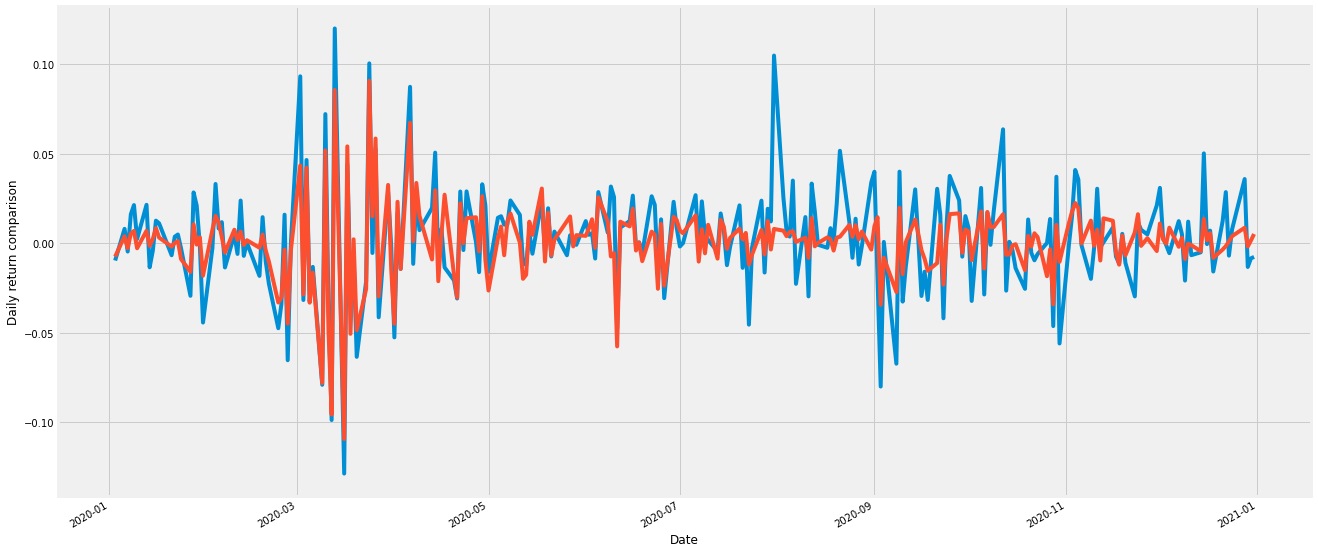

Blue line: your portfolio
Blue line: benchmark


In [ ]:
one = returns_benchmark(["AAPL", "AMD"], [1,0], "SPY", "2020-01-01", "2021-01-01")

In [ ]:
 def graph_cum_returns_benchmark(stocks, wts, benchmark, start_date, end_date):
  yf.pdr_override()

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  df2 = web.DataReader(benchmark, data_source='yahoo', start = start_date, end= end_date )

  ret_data = price_data.pct_change()[1:]
  return_df2 = df2.Close.pct_change()[1:]

  port_ret = (ret_data * wts).sum(axis = 1)
  cumulative_ret_df1 = (port_ret + 1).cumprod()
  cumulative_ret_df2 = (return_df2 + 1).cumprod()

  plt.figure(figsize=(20,10))
  cumulative_ret_df1.plot()
  cumulative_ret_df2.plot()
  plt.ylabel("Daily return comparison")
  plt.show()


In [ ]:
 def cum_returns_benchmark(stocks, wts, benchmark, start_date, end_date):
  yf.pdr_override()

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  df2 = web.DataReader(benchmark, data_source='yahoo', start = start_date, end= end_date )

  ret_data = price_data.pct_change()[1:]
  return_df2 = df2.Close.pct_change()[1:]

  port_ret = (ret_data * wts).sum(axis = 1)
  cumulative_ret_df1 = (port_ret + 1).cumprod()
  cumulative_ret_df2 = (return_df2 + 1).cumprod()

  df1 = pd.DataFrame(cumulative_ret_df1)
  df2 = pd.DataFrame(cumulative_ret_df2)
  df = pd.concat([df1,df2], axis=1)
  df = pd.DataFrame(df)
  df.columns = ['portfolio', 'benchmark']
  return df



In [ ]:
cum_returns_benchmark(["AAPL", "AMZN", "NFLX"], [0.2, 0.4, 0.4], "SPY", "2020-01-01", "2021-01-01")


,portfolio,benchmark
Date,,
2020-01-03,0.988458,0.992428
2020-01-06,1.007966,0.996214
2020-01-07,1.001762,0.993413
2020-01-08,1.012166,0.998707
2020-01-09,1.014113,1.005479
...,...,...
2020-12-24,1.679551,1.135839
2020-12-28,1.721859,1.145597
2020-12-29,1.740841,1.143411


In [ ]:
def backtest(stocks, wts, start_date, end_date):

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']


  ret_data = price_data.pct_change()[1:]

  port_ret = (ret_data * wts).sum(axis = 1)
  cumulative_ret_df1 = (port_ret + 1).cumprod()

  df1 = pd.DataFrame(cumulative_ret_df1)
  df1.columns = ['Return']
  return (df1.iloc[-1]-1)*100

In [ ]:
backtest(["AAPL", "GME", "TSLA"], [0.3, 0.4, 0.3], "2020-01-01", "2021-01-01")

Return    319.652123
Name: 2020-12-31 00:00:00, dtype: float64

In [ ]:
 def cum_returns_benchmark(stocks, wts, benchmark, start_date, end_date):
  yf.pdr_override()

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  df2 = web.DataReader(benchmark, data_source='yahoo', start = start_date, end= end_date )

  ret_data = price_data.pct_change()[1:]
  return_df2 = df2.Close.pct_change()[1:]

  port_ret = (ret_data * wts).sum(axis = 1)
  cumulative_ret_df1 = (port_ret + 1).cumprod()
  cumulative_ret_df2 = (return_df2 + 1).cumprod()
  df1 = pd.DataFrame(cumulative_ret_df1)
  df2 = pd.DataFrame(cumulative_ret_df2)
  df = pd.concat([df1,df2], axis=1)
  df.columns = ['portfolio', 'benchmark']
  return df


In [ ]:
df1 = cum_returns_benchmark(["AAPL", "AMD", "MSFT"], [0.3, 0.4, 0.3], "SPY", "2020-01-01", "2021-01-01")
df1

,portfolio,benchmark
Date,,
2020-01-03,0.989275,0.992428
2020-01-06,0.990697,0.996214
2020-01-07,0.985443,0.993413
2020-01-08,0.991476,0.998707
2020-01-09,1.010962,1.005479
...,...,...
2020-12-24,1.733007,1.135839
2020-12-28,1.755174,1.145597
2020-12-29,1.738756,1.143411


In [ ]:
def beta(stocks, wts, benchmark, start_date, end_date):
  yf.pdr_override()

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  df2 = web.DataReader(benchmark, data_source='yahoo', start = start_date, end= end_date )

  ret_data = price_data.pct_change()[1:]
  return_df2 = df2.Close.pct_change()[1:]

  port_ret = (ret_data * wts).sum(axis = 1)

  X = return_df2.values
  Y = port_ret.values

  def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    X = x[:,1]
    return model.params[0], model.params[1]

  alpha, beta = linreg(X,Y)
  print(beta)


In [ ]:
def alpha(stocks, wts, benchmark, start_date, end_date):
  yf.pdr_override()

  price_data = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )
  price_data = price_data['Adj Close']

  df2 = web.DataReader(benchmark, data_source='yahoo', start = start_date, end= end_date )

  ret_data = price_data.pct_change()[1:]
  return_df2 = df2.Close.pct_change()[1:]

  port_ret = (ret_data * wts).sum(axis = 1)

  X = return_df2.values
  Y = port_ret.values

  def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    X = x[:,1]
    return model.params[0], model.params[1]

  alpha, beta = linreg(X,Y)
  print(alpha)


In [ ]:
alpha(["AAPL", "AMD", "MSFT"], [0.3, 0.6, 0.1], "SPY", "2020-01-01", "2021-01-01")

0.0020013528684340864


In [ ]:
def efficient_frontier(stocks, start_date, end_date, iterations):

  stock_raw = web.DataReader(stocks, 'yahoo', "2020-01-01", "2021-01-01")
  stock = stock_raw['Close']
  df = pd.DataFrame(stock)
  port_ret = stock.sum(axis=1)
  log_ret = np.log(stock/stock.shift(1))
  num_runs = iterations

  all_weights = np.zeros((num_runs,len(stock.columns)))
  ret_arr = np.zeros(num_runs)
  vol_arr = np.zeros(num_runs)
  sharpe_arr = np.zeros(num_runs)

  for ind in range(num_runs):

      # Create Random Weights
      weights = np.array(np.random.random(len(stocks)))

      # Rebalance Weights
      weights = weights / np.sum(weights)
      
      # Save Weights
      all_weights[ind,:] = weights

      # Expected Return
      ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

      # Expected Variance
      vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

      # Sharpe Ratio
      sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
  
  max_sr_ret = ret_arr[sharpe_arr.argmax()]
  max_sr_vol = vol_arr[sharpe_arr.argmax()]

  print('Return with Maximum SR (in %):')
  print(max_sr_ret*100)
  print('Volality with Maximum SR (in %):')
  print(max_sr_vol*100)
  print('Max Sharpe Ratio:')
  print(sharpe_arr.max())
  print('Optimized allocation (in %):')
  allocation = [i * 100 for i in all_weights[sharpe_arr.argmax(),:] ]
  print(allocation)
  
  plt.figure(figsize=(14,8))
  plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
  plt.colorbar(label='Sharpe Ratio')
  plt.xlabel('Volatility')
  plt.ylabel('Return')

  # Add red dot for max SR
  plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')
  
  

 

Return with Maximum SR (in %):
200.775985999658
Volality with Maximum SR (in %):
85.52060790228172
Max Sharpe Ratio:
2.347691286631993
Optimized allocation (in %):
[6.230657294420992, 0.05446459570972223, 93.71487810986928]


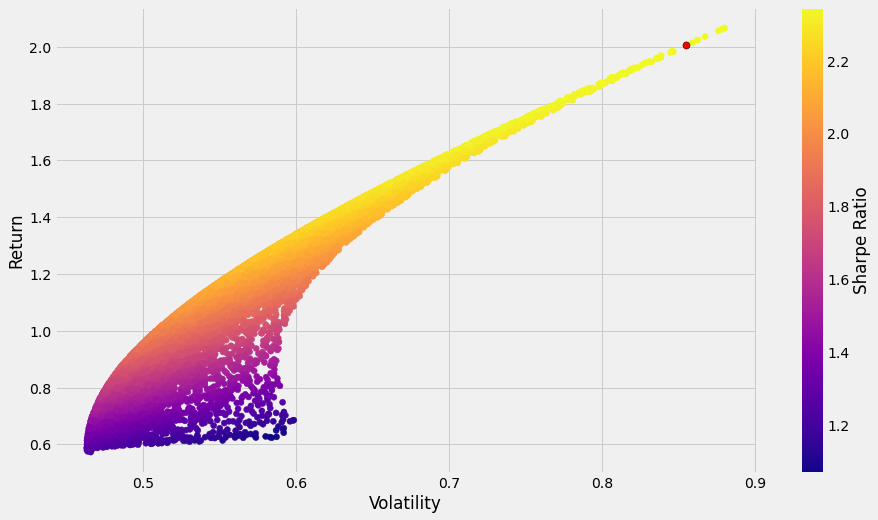

In [ ]:
stocks = ["AAPL", "AMD", "TSLA"]
efficient_frontier(stocks, "2020-01-01", "2021-01-01", 10000)

In [ ]:
def individual_cum_returns_graph(stocks, start_date, end_date):

  stock_raw = web.DataReader(stocks, 'yahoo', "2020-01-01", "2021-01-01")
  stock = stock_raw['Close']
  port_ret = stock.sum(axis=1)
  stock_normed = stock/stock.iloc[0]
  stock_normed.plot(figsize=(12,8))

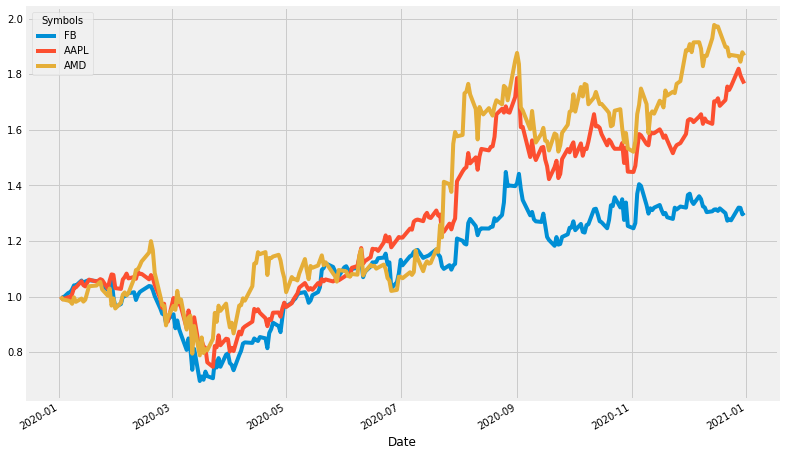

In [ ]:
individual_cum_returns_graph(["FB", "AAPL", "AMD"],"2020-01-01", "2021-01-01")

In [ ]:
def individual_cum_returns(stocks, start_date, end_date):

  stock_raw = web.DataReader(stocks, 'yahoo', "2020-01-01", "2021-01-01")
  stock = stock_raw['Close']
  port_ret = stock.sum(axis=1)
  stock_normed = stock/stock.iloc[0]
  return stock_normed

In [ ]:
df1 = individual_cum_returns(["FB", "AAPL", "AMD"],"2020-01-01", "2021-01-01")
df1

Symbols,FB,AAPL,AMD
Date,,,
2020-01-02,1.000000,1.000000,1.000000
2020-01-03,0.994709,0.990278,0.989817
2020-01-06,1.013443,0.998169,0.985540
2020-01-07,1.015635,0.993474,0.982688
2020-01-08,1.025932,1.009456,0.974134
...,...,...,...
2020-12-24,1.274669,1.757550,1.869857
2020-12-28,1.320431,1.820410,1.865580
2020-12-29,1.319382,1.796171,1.845621


In [ ]:
df = df1.iloc[-1:]

In [ ]:
def individual_mean_daily_return(stocks, start_date, end_date):
  stock_raw = web.DataReader(stocks, 'yahoo', start_date, end_date)
  stock = stock_raw['Close']
  port_ret = stock.sum(axis=1)
  mean_daily_ret = stock.pct_change(1).mean()
  df = pd.DataFrame(mean_daily_ret)
  df.columns = ['individual mean daily return']
  return df

In [ ]:
individual_mean_daily_return(["FB", "AAPL", "AMD"],"2020-01-01", "2021-01-01")

,individual mean daily return
Symbols,
FB,0.001467
AAPL,0.002693
AMD,0.003210


In [ ]:
def portfolio_daily_mean_return(stocks,wts, start_date, end_date):
  stock_raw = web.DataReader(stocks, 'yahoo', start_date, end_date)
  stock = stock_raw['Close']
  port_ret = (stock * wts).sum(axis = 1)
  cum_port = port_ret.pct_change(1)
  mean_return_port = cum_port.mean()
  return mean_return_port

In [ ]:
portfolio_daily_mean_return(["FB", "AAPL", "AMD"],[0.3, 0.4, 0.3],"2020-01-01", "2021-01-01")

0.0020094057105309654

In [ ]:
def VaR(stock, start_date, end_date, confidence_level):
  df = yf.download(stock, start_date, end_date) 
  df = df[['Close']]
  df['returns'] = df.Close.pct_change()

  mean = np.mean(df['returns'])
  std_dev = np.std(df['returns'])    

  df['returns'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x,x)
  plt.show()

  VaR = norm.ppf(1-confidence_level/100, mean, std_dev)


  print(tabulate([[confidence_level, VaR]], headers=['Confidence Level', 'Value at Risk']))

[*********************100%***********************]  1 of 1 downloaded


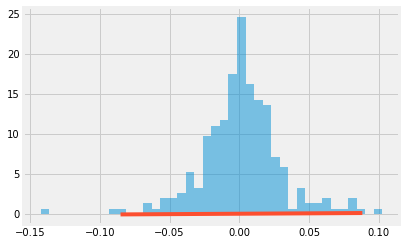

  Confidence Level    Value at Risk
------------------  ---------------
                98        -0.057853


In [ ]:
VaR("FB","2020-01-01", "2021-01-01", 98)

In [ ]:
def correlation(stocks, start_date, end_date):
  df = web.DataReader(stocks, data_source='yahoo', start = start_date, end= end_date )['Close']
  df = pd.DataFrame(df)
  returns = df.pct_change()
  corr_matrix = returns.corr('pearson')
  return corr_matrix

In [ ]:
correlation(["FB", "AMD","AAPL"], "2020-01-01", "2021-01-01")

Symbols,FB,AMD,AAPL
Symbols,,,
FB,1.000000,0.557235,0.766857
AMD,0.557235,1.000000,0.658241
AAPL,0.766857,0.658241,1.000000


In [ ]:
return_fb = returns("FB", "2020-01-10", "2021-01-01")
return_aapl = returns("AAPL", "2020-01-10", "2021-01-01")
df = pd.concat([return_fb, return_aapl], axis=1)
df

,Close,Close
Date,,
2020-01-10,NaN,NaN
2020-01-13,0.017656,0.021364
2020-01-14,-0.012843,-0.013503
2020-01-15,0.009541,-0.004286
2020-01-16,0.002804,0.012526
...,...,...
2020-12-24,-0.002648,0.007712
2020-12-28,0.035901,0.035766
2020-12-29,-0.000794,-0.013315


In [ ]:
def VaR(value_invested, stocks, wts, start_date, end_date, alpha=0.95, lookback_days=520):
  price_data = web.DataReader(['AAPL', 'FB'], 'yahoo', '2020-01-01', '2021-01-01')
  price_data = price_data['Adj Close']
  ret_data = price_data.pct_change()[1:]
  weighted_returns = ([0.1, 0.9] * ret_data)
  port_ret = weighted_returns.sum(axis=1)
  #df = pd.concat([return_fb, return_aapl], axis=1)
  port_ret = port_ret.fillna(0.0)

    # Compute the correct percentile loss and multiply by value invested
  return np.percentile(port_ret, 100 * (1-alpha)) * value_invested

In [ ]:
def graph_VaR(value_invested, stocks, wts, start_date, end_date, alpha=0.95, lookback_days=520):
  

In [ ]:
value_at_risk(10000, ["AAPL", "TSLA"], [0.1, 0.9], "2020-01-01", "2021-01-01", alpha=0.99, lookback_days=520)

-715.9100845155298

In [ ]:
from datetime import datetime, timedelta
    
d = datetime.today() - timedelta(days=10)
d.floor('Min')

AttributeError: ignored

In [ ]:
#try that https://www.interviewqs.com/blog/value-at-risk
#add var and cvar
#datetime eff frontier
#dashboard
#backtest portfolio
#sentiment analysis

In [ ]:
price_data = web.DataReader(['AAPL', 'FB'], 'yahoo', '2020-01-01', '2021-01-01')
price_data = price_data['Adj Close']
ret_data = price_data.pct_change()[1:]
weighted_returns = ([0.1, 0.9] * ret_data)
port_ret = weighted_returns.sum(axis=1)
print(port_ret)

Date
2020-01-03   -0.005734
2020-01-06    0.017747
2020-01-07    0.001477
2020-01-08    0.010733
2020-01-09    0.015004
                ...   
2020-12-24   -0.001612
2020-12-28    0.035888
2020-12-29   -0.002046
2020-12-30   -0.016818
2020-12-31    0.003500
Length: 252, dtype: float64
